In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
# Handle missing values
empty_column = ['Gender']
df_fillna = df.fillna({col: "UnKnown" for col in empty_column})

filtered_col = ['Patient Id', 'index', 'Level']
filtered_data = df[[col for col in df.columns if col not in filtered_col]]
df_fillna_mean = df.fillna(filtered_data.mean())

In [ ]:
missing_values_count = df.isnull().sum()
print("Missing values count:", missing_values_count)

Missing values count: index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


In [ ]:
# 2. Identify Outliers (using IQR)
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR))]
# print("Outliers:", outliers)

df_cleaned = df[~((df['Age'] < (Q1 - 1.5 * IQR)) | (df['Age'] > (Q3 + 1.5 * IQR)))]

In [ ]:
# remove irrelevent feature

from sklearn.feature_selection import VarianceThreshold
filtered_col = ['Patient Id', 'index', 'Level']
numerical_features = df[[col for col in df.columns if col not in filtered_col]]

# threshold (0.5 here) minimum variance
selector_variance = VarianceThreshold(threshold=0.5)
# Transform the numerical features into a boolean array
data_filtered_var = selector_variance.fit_transform(numerical_features)

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Patient Id_encoder'] = encoder.fit_transform(df['Patient Id'])
df.drop('Patient Id', axis=1, inplace=True)  # axis=1 for columns

print(df['Patient Id_encoder'])

0        0
1        1
2        2
3        3
4        4
      ... 
995    995
996    996
997    997
998    998
999    999
Name: Patient Id_encoder, Length: 1000, dtype: int64


In [ ]:
# Splitting

from sklearn.model_selection import train_test_split
X = df.drop('Level',axis=1)
Y = df['Level']

X_train,X_test, Y_train,y_test= train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=42) #split data into valdition test
X_train.head()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Patient Id_encoder
222,222,47,1,6,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,222
925,925,28,1,6,7,8,7,6,7,7,...,2,3,6,4,2,3,1,2,1,925
194,194,36,2,2,1,5,3,2,3,2,...,6,7,2,5,8,1,3,2,3,194
17,17,34,1,6,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,17
162,162,23,2,4,2,3,4,2,3,2,...,1,3,4,2,4,2,4,3,1,162


In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

sc = StandardScaler()

column_transformer = make_column_transformer(
    (OneHotEncoder(), ['Gender']),
    (StandardScaler(), ['Air Pollution', 'Alcohol use']),
     remainder='passthrough')

# X_train = ... # fit transform your train data
X_train = column_transformer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns=column_transformer.get_feature_names_out())

# X_test = ... # transform test data
X_test = column_transformer.transform(X_test)
X_test = pd.DataFrame(data=X_test, columns=column_transformer.get_feature_names_out())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
data_num_scaled = scaler.fit_transform(numerical_features)
data_num_scaled

array([[0.3220339 , 0.        , 0.14285714, ..., 0.16666667, 0.33333333,
        0.5       ],
       [0.05084746, 0.        , 0.28571429, ..., 0.        , 1.        ,
        0.16666667],
       [0.3559322 , 0.        , 0.42857143, ..., 0.83333333, 1.        ,
        0.16666667],
       ...,
       [0.18644068, 1.        , 0.42857143, ..., 0.83333333, 1.        ,
        0.16666667],
       [0.06779661, 1.        , 0.71428571, ..., 0.5       , 0.16666667,
        0.33333333],
       [0.55932203, 0.        , 0.71428571, ..., 0.83333333, 1.        ,
        0.16666667]])

In [ ]:
# Importing required libraries
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

clf = SVC(kernel='poly', gamma=0.01, C=1000)
clf.fit(X_train, Y_train)

# Make predictions and check the accuracy
predictions = clf.predict(X_test)
print("accuracy score:",accuracy_score(y_test, predictions))

f1 = f1_score(y_test, predictions, average='weighted')
print("\nF1 Score:", f1)


accuracy score: 0.98

F1 Score: 0.9799819209039548


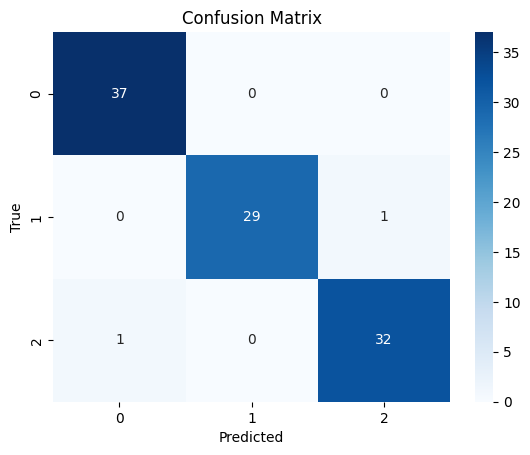

In [ ]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()